In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from sklearn.model_selection import KFold
#from utils.models import *
#from utils.align import *
#from utils.generator import *
from utils.ensemble import *
from keras import applications
from pretrained.vgg19 import *

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GTX 1060 6GB (0000:01:00.0)


In [8]:
import numpy as np, numpy.random
print np.random.dirichlet(np.ones(10),size=1)

[[ 0.0680757   0.03675143  0.07911436  0.03325319  0.0552886   0.14320362
   0.27512649  0.26011873  0.02501367  0.0240542 ]]


In [2]:
weights_combo_1 = [0.3,0.3,0.2,0.2]

generate_ensemble_submission('ensemble_resnet50_densenet121_vgg16_jagg2_tta_w3322.csv', weights_combo_1)

ensembling kaggle submission files: ['tta_submission_resnet50_20170718-085651_score_092912.csv', 'tta_submission_densenet121_20170717-161234_score_092785.csv', 'tta_submission_vgg16_20170717-171015_score_092680.csv', 'submission_20170626-025551_score_091200.csv']


100%|██████████████████████████████████████████████████████████████████████████| 61191/61191 [00:57<00:00, 1069.59it/s]


submission file generated: D:/Downloads/amazon/my_submissions/ensemble/ensemble_resnet50_densenet121_vgg16_jagg2_tta_w3322.csv


In [6]:
a = np.array([[1, 2, 3], [5, 6, 7]])
b = np.array([[10, 20, 30], [10, 20, 30]])

print(np.mean([a,b], axis=0))


[[  5.5  11.   16.5]
 [  7.5  13.   18.5]]


In [3]:
model = vgg19_model()
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           zeropadding2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 64, 224, 224)  36928       zeropadding2d_2[0][0]            
___________________________________________________________________________________________

In [4]:
# visualize layers
for i, layer in enumerate(model.layers):
   print(i, layer.name, layer.trainable if hasattr(layer, 'trainable') else False)

(0, 'zeropadding2d_1', True)
(1, 'convolution2d_1', True)
(2, 'zeropadding2d_2', True)
(3, 'convolution2d_2', True)
(4, 'maxpooling2d_1', True)
(5, 'zeropadding2d_3', True)
(6, 'convolution2d_3', True)
(7, 'zeropadding2d_4', True)
(8, 'convolution2d_4', True)
(9, 'maxpooling2d_2', True)
(10, 'zeropadding2d_5', True)
(11, 'convolution2d_5', True)
(12, 'zeropadding2d_6', True)
(13, 'convolution2d_6', True)
(14, 'zeropadding2d_7', True)
(15, 'convolution2d_7', True)
(16, 'zeropadding2d_8', True)
(17, 'convolution2d_8', True)
(18, 'maxpooling2d_3', True)
(19, 'zeropadding2d_9', True)
(20, 'convolution2d_9', True)
(21, 'zeropadding2d_10', True)
(22, 'convolution2d_10', True)
(23, 'zeropadding2d_11', True)
(24, 'convolution2d_11', True)
(25, 'zeropadding2d_12', True)
(26, 'convolution2d_12', True)
(27, 'maxpooling2d_4', True)
(28, 'zeropadding2d_13', True)
(29, 'convolution2d_13', True)
(30, 'zeropadding2d_14', True)
(31, 'convolution2d_14', True)
(32, 'zeropadding2d_15', True)
(33, 'convolu

In [4]:
model = applications.InceptionV3(include_top=True)
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 3, 299, 299)   0                                            
____________________________________________________________________________________________________
convolution2d_95 (Convolution2D) (None, 32, 149, 149)  896         input_2[0][0]                    
____________________________________________________________________________________________________
batchnormalization_95 (BatchNorm (None, 32, 149, 149)  128         convolution2d_95[0][0]           
____________________________________________________________________________________________________
convolution2d_96 (Convolution2D) (None, 32, 147, 147)  9248        batchnormalization_95[0][0]      
___________________________________________________________________________________________

In [3]:
# visualize layers
for i, layer in enumerate(model.layers):
   print(i, layer.name, layer.trainable if hasattr(layer, 'trainable') else False)

(0, 'input_1', False)
(1, 'convolution2d_1', True)
(2, 'batchnormalization_1', True)
(3, 'convolution2d_2', True)
(4, 'batchnormalization_2', True)
(5, 'convolution2d_3', True)
(6, 'batchnormalization_3', True)
(7, 'maxpooling2d_1', True)
(8, 'convolution2d_4', True)
(9, 'batchnormalization_4', True)
(10, 'convolution2d_5', True)
(11, 'batchnormalization_5', True)
(12, 'maxpooling2d_2', True)
(13, 'convolution2d_9', True)
(14, 'batchnormalization_9', True)
(15, 'convolution2d_7', True)
(16, 'convolution2d_10', True)
(17, 'batchnormalization_7', True)
(18, 'batchnormalization_10', True)
(19, 'averagepooling2d_1', True)
(20, 'convolution2d_6', True)
(21, 'convolution2d_8', True)
(22, 'convolution2d_11', True)
(23, 'convolution2d_12', True)
(24, 'batchnormalization_6', True)
(25, 'batchnormalization_8', True)
(26, 'batchnormalization_11', True)
(27, 'batchnormalization_12', True)
(28, 'mixed0', False)
(29, 'convolution2d_16', True)
(30, 'batchnormalization_16', True)
(31, 'convolution2d_1

In [2]:
model = applications.ResNet50(weights='imagenet', include_top=False)
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, None, None) 0                                            
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, None, None) 0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 64, None, None 9472        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 64, None, None 256         conv1[0][0]                      
___________________________________________________________________________________________

In [3]:
# visualize layers
for i, layer in enumerate(model.layers):
   print(i, layer.name, layer.trainable if hasattr(layer, 'trainable') else False)


(0, 'input_1', False)
(1, 'zeropadding2d_1', True)
(2, 'conv1', True)
(3, 'bn_conv1', True)
(4, 'activation_1', True)
(5, 'maxpooling2d_1', True)
(6, 'res2a_branch2a', True)
(7, 'bn2a_branch2a', True)
(8, 'activation_2', True)
(9, 'res2a_branch2b', True)
(10, 'bn2a_branch2b', True)
(11, 'activation_3', True)
(12, 'res2a_branch2c', True)
(13, 'res2a_branch1', True)
(14, 'bn2a_branch2c', True)
(15, 'bn2a_branch1', True)
(16, 'merge_1', False)
(17, 'activation_4', True)
(18, 'res2b_branch2a', True)
(19, 'bn2b_branch2a', True)
(20, 'activation_5', True)
(21, 'res2b_branch2b', True)
(22, 'bn2b_branch2b', True)
(23, 'activation_6', True)
(24, 'res2b_branch2c', True)
(25, 'bn2b_branch2c', True)
(26, 'merge_2', False)
(27, 'activation_7', True)
(28, 'res2c_branch2a', True)
(29, 'bn2c_branch2a', True)
(30, 'activation_8', True)
(31, 'res2c_branch2b', True)
(32, 'bn2c_branch2b', True)
(33, 'activation_9', True)
(34, 'res2c_branch2c', True)
(35, 'bn2c_branch2c', True)
(36, 'merge_3', False)
(37, 

In [2]:
model = applications.VGG16(weights='imagenet', include_top=False)
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, None, None) 0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, None, None 1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, None, None 36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, None, None 0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [3]:
# visualize layers
for i, layer in enumerate(model.layers):
   print(i, layer.name, layer.trainable if hasattr(layer, 'trainable') else False)



(0, 'input_1', False)
(1, 'block1_conv1', True)
(2, 'block1_conv2', True)
(3, 'block1_pool', True)
(4, 'block2_conv1', True)
(5, 'block2_conv2', True)
(6, 'block2_pool', True)
(7, 'block3_conv1', True)
(8, 'block3_conv2', True)
(9, 'block3_conv3', True)
(10, 'block3_pool', True)
(11, 'block4_conv1', True)
(12, 'block4_conv2', True)
(13, 'block4_conv3', True)
(14, 'block4_pool', True)
(15, 'block5_conv1', True)
(16, 'block5_conv2', True)
(17, 'block5_conv3', True)
(18, 'block5_pool', True)


In [4]:
model = applications.VGG16(weights='imagenet', include_top=True)
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 3, 224, 224)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 224, 224)  1792        input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 224, 224)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 112, 112)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [5]:
# visualize layers
for i, layer in enumerate(model.layers):
   print(i, layer.name, layer.trainable if hasattr(layer, 'trainable') else False)

(0, 'input_2', False)
(1, 'block1_conv1', True)
(2, 'block1_conv2', True)
(3, 'block1_pool', True)
(4, 'block2_conv1', True)
(5, 'block2_conv2', True)
(6, 'block2_pool', True)
(7, 'block3_conv1', True)
(8, 'block3_conv2', True)
(9, 'block3_conv3', True)
(10, 'block3_pool', True)
(11, 'block4_conv1', True)
(12, 'block4_conv2', True)
(13, 'block4_conv3', True)
(14, 'block4_pool', True)
(15, 'block5_conv1', True)
(16, 'block5_conv2', True)
(17, 'block5_conv3', True)
(18, 'block5_pool', True)
(19, 'flatten', True)
(20, 'fc1', True)
(21, 'fc2', True)
(22, 'predictions', True)


In [16]:
import uuid
print(str(uuid.uuid4()))
import time
print(time.strftime("%Y%m%d-%H%M%S"))

a765844c-a114-478c-a96d-212bb6f06ec4
20170628-072324


In [2]:
generate_ensemble_submission('ensemble_test.csv')

100%|██████████████████████████████████████████████████████████████████████████| 61191/61191 [00:56<00:00, 1089.95it/s]


submission file generated: D:/Downloads/amazon/my_submissions/ensemble/ensemble_test.csv


In [28]:
submission1 = pd.read_csv('D:/Downloads/amazon/my_submissions/submission_20170625-111821_score_090968.csv')
#submission2 = pd.read_csv('D:/Downloads/amazon/my_submissions/submission_20170523-210232_score_090961.csv')
submission2 = pd.read_csv('D:/Downloads/amazon/my_submissions/submission_20170621-232155_score_0907.csv')

diff = (submission1 != submission2)

#diff.head()

submission2 = submission2.rename(columns={'tags': 'tags2'})
#submission2.columns = ['image_name', 'tags2']

#submission2.head()

combined = pd.concat([submission1, submission2], axis=1)

combined.head()

result = combined[diff['tags']]
result[:200]

print('same', (diff['tags']==1).sum())
print('different', (diff['tags']==0).sum())



('same', 19636)
('different', 41555)


In [13]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2, shuffle=True)
kf.get_n_splits(X)

print(kf)




KFold(n_splits=2, random_state=None, shuffle=True)


In [15]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #print('Start KFold number {} from {}'.format(num_fold, nfolds))
    print('Split train: ', len(X_train), len(y_train))
    print('Split valid: ', len(X_test), len(y_test))


('TRAIN:', array([0, 1], dtype=int64), 'TEST:', array([2, 3], dtype=int64))
('Split train: ', 2, 2)
('Split valid: ', 2, 2)
('TRAIN:', array([2, 3], dtype=int64), 'TEST:', array([0, 1], dtype=int64))
('Split train: ', 2, 2)
('Split valid: ', 2, 2)


In [4]:
test = np.asarray([1,2,3,4,5])
test = test / float(255)
print(test)
print(test[0:5])

[ 0.00392157  0.00784314  0.01176471  0.01568627  0.01960784]
[ 0.00392157  0.00784314  0.01176471  0.01568627  0.01960784]


In [10]:
threshold = np.random.uniform(low=0.0, high=1.0, size=(17))
print(threshold)

[ 0.98897945  0.86356926  0.00574615  0.20246553  0.83269828  0.94339513
  0.32532105  0.73151853  0.98098446  0.10027523  0.55345299  0.6433027
  0.93283794  0.51644266  0.88752097  0.14641542  0.67270878]


In [13]:
pred = np.random.uniform(low=0.0, high=1.0, size=(10,17))
print(pred)
print(pred.shape[1])

[[ 0.71866931  0.37071542  0.25747142  0.19845476  0.82290012  0.87166765
   0.1265113   0.91300897  0.06859385  0.76221252  0.18469959  0.325558
   0.16164087  0.55684411  0.79472625  0.74226203  0.48453512]
 [ 0.0444302   0.76910368  0.27200232  0.1634991   0.05805072  0.19272633
   0.44888826  0.07095029  0.40876541  0.82105426  0.91073469  0.6051755
   0.92894975  0.82745031  0.00740463  0.69713487  0.61829663]
 [ 0.77686088  0.15377061  0.02851445  0.95569442  0.71947544  0.21670085
   0.32697622  0.02554749  0.1174709   0.02948691  0.65272431  0.05120691
   0.76012099  0.73926971  0.87221123  0.41290017  0.76049972]
 [ 0.52952774  0.51381025  0.59460923  0.11839231  0.68926683  0.08594834
   0.40706969  0.33210222  0.18646349  0.40482549  0.38436788  0.69161606
   0.82884268  0.50238951  0.93747478  0.96635731  0.88976185]
 [ 0.94144337  0.33030463  0.31716553  0.24162995  0.12037438  0.18881801
   0.66298639  0.10343194  0.64933999  0.13148751  0.62434809  0.38691462
   0.923347

In [4]:
t = pred > threshold
print (t)

[[ True  True False False False  True False  True  True False False  True
   True False  True  True False]
 [ True  True  True False False False False False False False False  True
  False False  True  True False]
 [ True  True False False False False  True False  True False False  True
   True False  True  True  True]
 [False  True False False False False False  True False False False False
  False False  True False  True]
 [ True  True False False False False  True False False False False False
  False False False  True  True]
 [ True  True False False False False False False  True  True False  True
  False False  True  True  True]
 [ True False False  True  True False  True False  True False False  True
  False False  True  True False]
 [ True  True False False False False  True  True False  True False  True
  False False  True False  True]
 [ True  True False  True False False False  True False  True False  True
   True False  True  True  True]
 [ True False False  True False False

In [5]:
m = 1
m /= float(100)
print (m)

0.01


In [6]:
abc = [1,2,3,4,5,6]
abc[:3]

[1, 2, 3]

In [7]:
print(pred.shape[0])
print(pred.shape[1])

10
17


In [8]:
print(threshold[2:4])

[ 0.71584207  0.62680256]


In [13]:
a = np.array([[1, 2], [3, 4]])

In [19]:
b = np.array([])
b = np.vstack([a,b]) if b.size else a
print(b)

[[1 2]
 [3 4]]


In [12]:
data_mask_label = np.array(['R', 'G', 'B', 'NDVI', 'NDWI', 'NIR'])
data_mask = np.array([True,True,True,True,False,False]) # RGB+NDVI
filtered = data_mask_label[data_mask]
print(np.array_str(filtered))

['R' 'G' 'B' 'NDVI']


In [14]:
def duplicate_samples_y(train_X, train_Y, dup_target_y, multiplier=2):
    """duplicate samples.  train_Y has N 1,0 tuples.  dup_target_y in [0,N). append to end of input arrays"""
    
    target_y = train_Y[:,dup_target_y]
    print(target_y)
    mask = ma.make_mask(target_y)
    additional_X = train_X[mask]
    print(additional_X)
    additional_Y = train_Y[mask]
    print(additional_Y)
    
    for i in range(1, multiplier):
        train_X = np.concatenate((train_X, additional_X), axis=0)
        train_Y = np.concatenate((train_Y, additional_Y), axis=0)

    return train_X, train_Y

In [15]:
x = np.array([1,2,300,4,500,6])
y = np.array([[0,1,1,0], [0,1,1,1], [0,0,0,0], [0,1,1,0], [0,1,0,0], [1,1,1,1]])


newx, newy = duplicate_samples_y(x, y, 3, multiplier=3)
print(newx)
print(newy)

[0 1 0 0 0 1]
[2 6]
[[0 1 1 1]
 [1 1 1 1]]
[  1   2 300   4 500   6   2   6   2   6]
[[0 1 1 0]
 [0 1 1 1]
 [0 0 0 0]
 [0 1 1 0]
 [0 1 0 0]
 [1 1 1 1]
 [0 1 1 1]
 [1 1 1 1]
 [0 1 1 1]
 [1 1 1 1]]


In [2]:
labels = ['slash_burn', 'clear', 'blooming', 'primary', 'cloudy', 'conventional_mine', 'water', 'haze', 'cultivation', 'partly_cloudy', 'artisinal_mine', 'habitation', 'bare_ground', 'blow_down', 'agriculture', 'road', 'selective_logging']
labels.index('habitation')

11

In [3]:
recall_l = np.random.uniform(low=0.0, high=1.0, size=(17))
precision_l = np.random.uniform(low=0.5, high=0.8, size=(17))

print (recall_l)
print (precision_l)

count_stats_df = pd.DataFrame({
    'label': labels, 
    'recall': recall_l,
    'precision': precision_l
})

[ 0.67110686  0.45373571  0.31221583  0.32049423  0.56789333  0.94410113
  0.66482473  0.06186901  0.10256963  0.74259393  0.24041905  0.89804437
  0.36899212  0.08540033  0.27440888  0.26618049  0.40470576]
[ 0.61782945  0.53972064  0.52878542  0.68153201  0.55141485  0.51324694
  0.68263416  0.52582906  0.52535608  0.51513038  0.7961157   0.79964867
  0.50518597  0.74401729  0.72329192  0.56224621  0.67074485]


In [6]:
colors = cm.rainbow(np.linspace(0, 1, len(count_stats_df['label'])))

fig, ax = plt.subplots()
ax.scatter(count_stats_df['precision'], count_stats_df['recall'], c=colors)
ax.set_xlabel('precision')
ax.set_ylabel('recall')


In [7]:
for i, txt in enumerate(count_stats_df['label']):
    ax.annotate(txt, (count_stats_df['precision'][i], count_stats_df['recall'][i]))

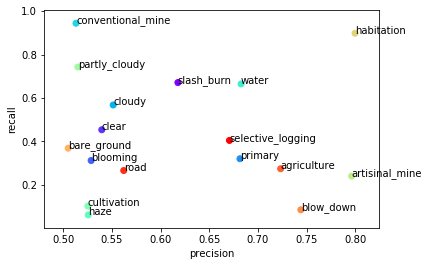

In [8]:
plt.show()

In [2]:
print(get_model_output_layer_size())
set_model_output_layer_size(1)
print(get_model_output_layer_size())

17
1


In [9]:
from utils.renderer import *

%matplotlib inline

# debug
#target_filename = 'train_2080'
#target_filename = 'train_2078' # primary fuzzy failed
#target_filename = 'train_10483'

#target_filename = 'train_17173' #cloud
#target_filename = 'train_18173'
#jpg_filename = train_jpg(target_filename)
#tiff_filename = train_tif(target_filename)

target_filename = 'file_12756'
#target_filename = 'file_12754' #IndexError
jpg_filename = test_jpg(target_filename)
tiff_filename = test_tif(target_filename)

jpg_img_raw = cv2.imread(jpg_filename)
tif_img_raw = cv2.imread(tiff_filename, cv2.IMREAD_UNCHANGED)

try:
    result = align_target_tif_to_jpg(tif_img_raw, jpg_img_raw, tif_img_raw, verbose=True)
    show_tiff_image_data(tif_img_raw)
except ValueError:
    print('Error: TIF and JPG are mismatched: {}'.format(target_filename))

IndexError: list index out of range

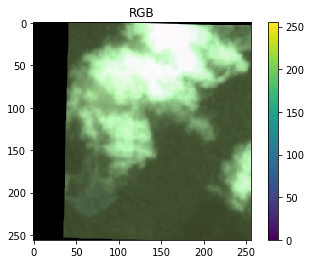

In [3]:
show_tiff_image_data(result)

In [2]:
score_file = 'master_scoreboard.csv'
df = pd.read_csv(score_file)
df.head()

,model_file,model_id,f2_score,val_accuracy,val_precision,val_recall,train_accuracy,train_precision,train_recall,training_time,num_channels,config,data_mask
0,aggregate_model_20170511-150149.h5,JAGG_1,0.889447,NaN,NaN,NaN,0.950815,0.902571,0.795162,0 days 00:07:02.069000000,4,NaN,RGBN
1,aggregate_model_20170511-180931.h5,JAGG_1,0.896287,NaN,NaN,NaN,0.953407,0.905887,0.808538,0 days 01:20:40.819000,3,NaN,NaN
2,aggregate_model_20170511-220711.h5,JAGG_1,0.893897,NaN,NaN,NaN,0.952527,0.905944,0.802767,0 days 01:40:52.325000,4,NaN,RGBN
3,aggregate_model_20170512-092940.h5,JAGG_1,0.884609,NaN,NaN,NaN,0.950599,0.901833,0.794459,0 days 01:40:18.884000,4,NaN,RGBN
4,aggregate_model_20170512-115655.h5,JAGG_1,0.888758,NaN,NaN,NaN,0.949077,0.903689,0.782218,0 days 02:06:06.810000,4,NaN,RGBN


In [6]:
df = df.round({'f2_score': 3, 'val_accuracy' : 3, 'val_precision': 3, 'val_recall' : 3, 
         'train_accuracy' : 3, 'train_precision': 3, 'train_recall' : 3})

In [8]:
df.head()

,model_file,model_id,f2_score,val_accuracy,val_precision,val_recall,train_accuracy,train_precision,train_recall,training_time,num_channels,config,data_mask
0,aggregate_model_20170511-150149.h5,JAGG_1,0.889,NaN,NaN,NaN,0.951,0.903,0.795,0 days 00:07:02.069000000,4,NaN,RGBN
1,aggregate_model_20170511-180931.h5,JAGG_1,0.896,NaN,NaN,NaN,0.953,0.906,0.809,0 days 01:20:40.819000,3,NaN,NaN
2,aggregate_model_20170511-220711.h5,JAGG_1,0.894,NaN,NaN,NaN,0.953,0.906,0.803,0 days 01:40:52.325000,4,NaN,RGBN
3,aggregate_model_20170512-092940.h5,JAGG_1,0.885,NaN,NaN,NaN,0.951,0.902,0.794,0 days 01:40:18.884000,4,NaN,RGBN
4,aggregate_model_20170512-115655.h5,JAGG_1,0.889,NaN,NaN,NaN,0.949,0.904,0.782,0 days 02:06:06.810000,4,NaN,RGBN


In [9]:
df['data_set'] = 'data_set'
df.head()

,model_file,model_id,f2_score,val_accuracy,val_precision,val_recall,train_accuracy,train_precision,train_recall,training_time,num_channels,config,data_mask,data_set
0,aggregate_model_20170511-150149.h5,JAGG_1,0.889,NaN,NaN,NaN,0.951,0.903,0.795,0 days 00:07:02.069000000,4,NaN,RGBN,data_set
1,aggregate_model_20170511-180931.h5,JAGG_1,0.896,NaN,NaN,NaN,0.953,0.906,0.809,0 days 01:20:40.819000,3,NaN,NaN,data_set
2,aggregate_model_20170511-220711.h5,JAGG_1,0.894,NaN,NaN,NaN,0.953,0.906,0.803,0 days 01:40:52.325000,4,NaN,RGBN,data_set
3,aggregate_model_20170512-092940.h5,JAGG_1,0.885,NaN,NaN,NaN,0.951,0.902,0.794,0 days 01:40:18.884000,4,NaN,RGBN,data_set
4,aggregate_model_20170512-115655.h5,JAGG_1,0.889,NaN,NaN,NaN,0.949,0.904,0.782,0 days 02:06:06.810000,4,NaN,RGBN,data_set


In [12]:
import os
print os.path.basename('D:/Downloads/amazon/haha.jpg')

haha.jpg


In [13]:
from utils.loader import *
print(get_training_set_file_path(64))

D:/Downloads/amazon/cache/train_set_dim64_rgb_ndvi_ndwi_nir_align_v3.h5


In [15]:
data_set_name = os.path.basename(get_training_set_file_path(64))
print(data_set_name)

train_set_dim64_rgb_ndvi_ndwi_nir_align_v3.h5


In [7]:
# demonstrate how we can combine 2 separate predictions into 1 by "max pooling"
a1 = np.random.uniform(low=1, high=10, size=(20))
a1 = a1.reshape(5,4)
print(a1)
a2 = np.random.uniform(low=1, high=10, size=(20))
a2 = a2.reshape(5,4)
print(a2)

a3 = np.vstack([np.expand_dims(a1,0), np.expand_dims(a2,0)]).max(axis=0)
#a3 = np.maximum(a1, a2)
print(a3)

[[ 2.73833715  8.5219365   8.01507247  7.41052702]
 [ 7.89246108  4.36597091  1.50750142  3.9586987 ]
 [ 8.44791358  7.13598433  3.27398301  9.46318885]
 [ 4.61161771  5.05087296  5.68148319  9.41096212]
 [ 3.00114928  4.33010095  7.33297701  5.83698979]]
[[ 1.87600096  2.842212    3.73725925  6.47255864]
 [ 8.45061094  4.08420319  4.27543086  6.97384376]
 [ 5.76940368  8.80128263  5.72139986  4.67449776]
 [ 8.13934867  3.77945241  4.43570805  5.99745744]
 [ 1.04608623  8.21795785  3.38297438  3.13522118]]
[[ 2.73833715  8.5219365   8.01507247  7.41052702]
 [ 8.45061094  4.36597091  4.27543086  6.97384376]
 [ 8.44791358  8.80128263  5.72139986  9.46318885]
 [ 8.13934867  5.05087296  5.68148319  9.41096212]
 [ 3.00114928  8.21795785  7.33297701  5.83698979]]


In [4]:
labels = ['slash_burn', 'clear', 'blooming', 'primary', 'cloudy', 'conventional_mine', 'water', 'haze', 'cultivation', 'partly_cloudy', 'artisinal_mine', 'habitation', 'bare_ground', 'blow_down', 'agriculture', 'road', 'selective_logging']

nums_ones = np.ones((1, 17))
nums_zeros = np.zeros((1, 17))
haha = np.array([[1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]])

y_testset_predictions = haha
result = pd.DataFrame(y_testset_predictions, columns = labels)

preds = []
for i in range(result.shape[0]):
    a = result.ix[[i]]
    #print(a)
    a = a.transpose()
    print(a)
    a = a.loc[a[i] == 1]
    print(a)
    ' '.join(list(a.index))
    preds.append(' '.join(list(a.index)))
    
print(preds)

                   0
slash_burn         1
clear              0
blooming           0
primary            0
cloudy             0
conventional_mine  0
water              0
haze               0
cultivation        0
partly_cloudy      0
artisinal_mine     1
habitation         0
bare_ground        0
blow_down          0
agriculture        0
road               0
selective_logging  0
                0
slash_burn      1
artisinal_mine  1
['slash_burn artisinal_mine']
